Une active communauté d'étudiants, chercheurs et bidouilleurs célèbrent à Marseille la ["journée π"](http://www.piday.fr) le 3ème mois, 14ème jour de chaque année. Une occasion de rêve pour en
apprendre plus sur les mathématiques et la science dans une ambiance conviviale... Mais c'est aussi l'occasion d'un concours de tartes!

J'ai eu l'opportunité d'y participer l'an dernier (soit pour l'édition [2016](https://www.piday.fr/)) avec une tarte appelée "Monte Carlo". Je vais donner ici la "recette" de ma tarte, le lien avec le nombre π et quelques digressions mathématiques (notament par rapport à la présence incongrue d'un éléphant mais aussi par rapport à la démarche scientifique)... Cette page est un "[notebook](http://jupyter.org/)" - vous pouvez donc la télécharger et relancer les analyses et figures (en utilisant python +  jupyter). C'est aussi un travail non figé - prière de me suggérer des corrections!

<!-- TEASER_END -->

Initialisons d'abord notre notebook:

In [1]:
from __future__ import division, print_function
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
fig_width = 10
figsize = (fig_width, fig_width)
%load_ext autoreload
%autoreload 2

La tarte ressemble à ceci:

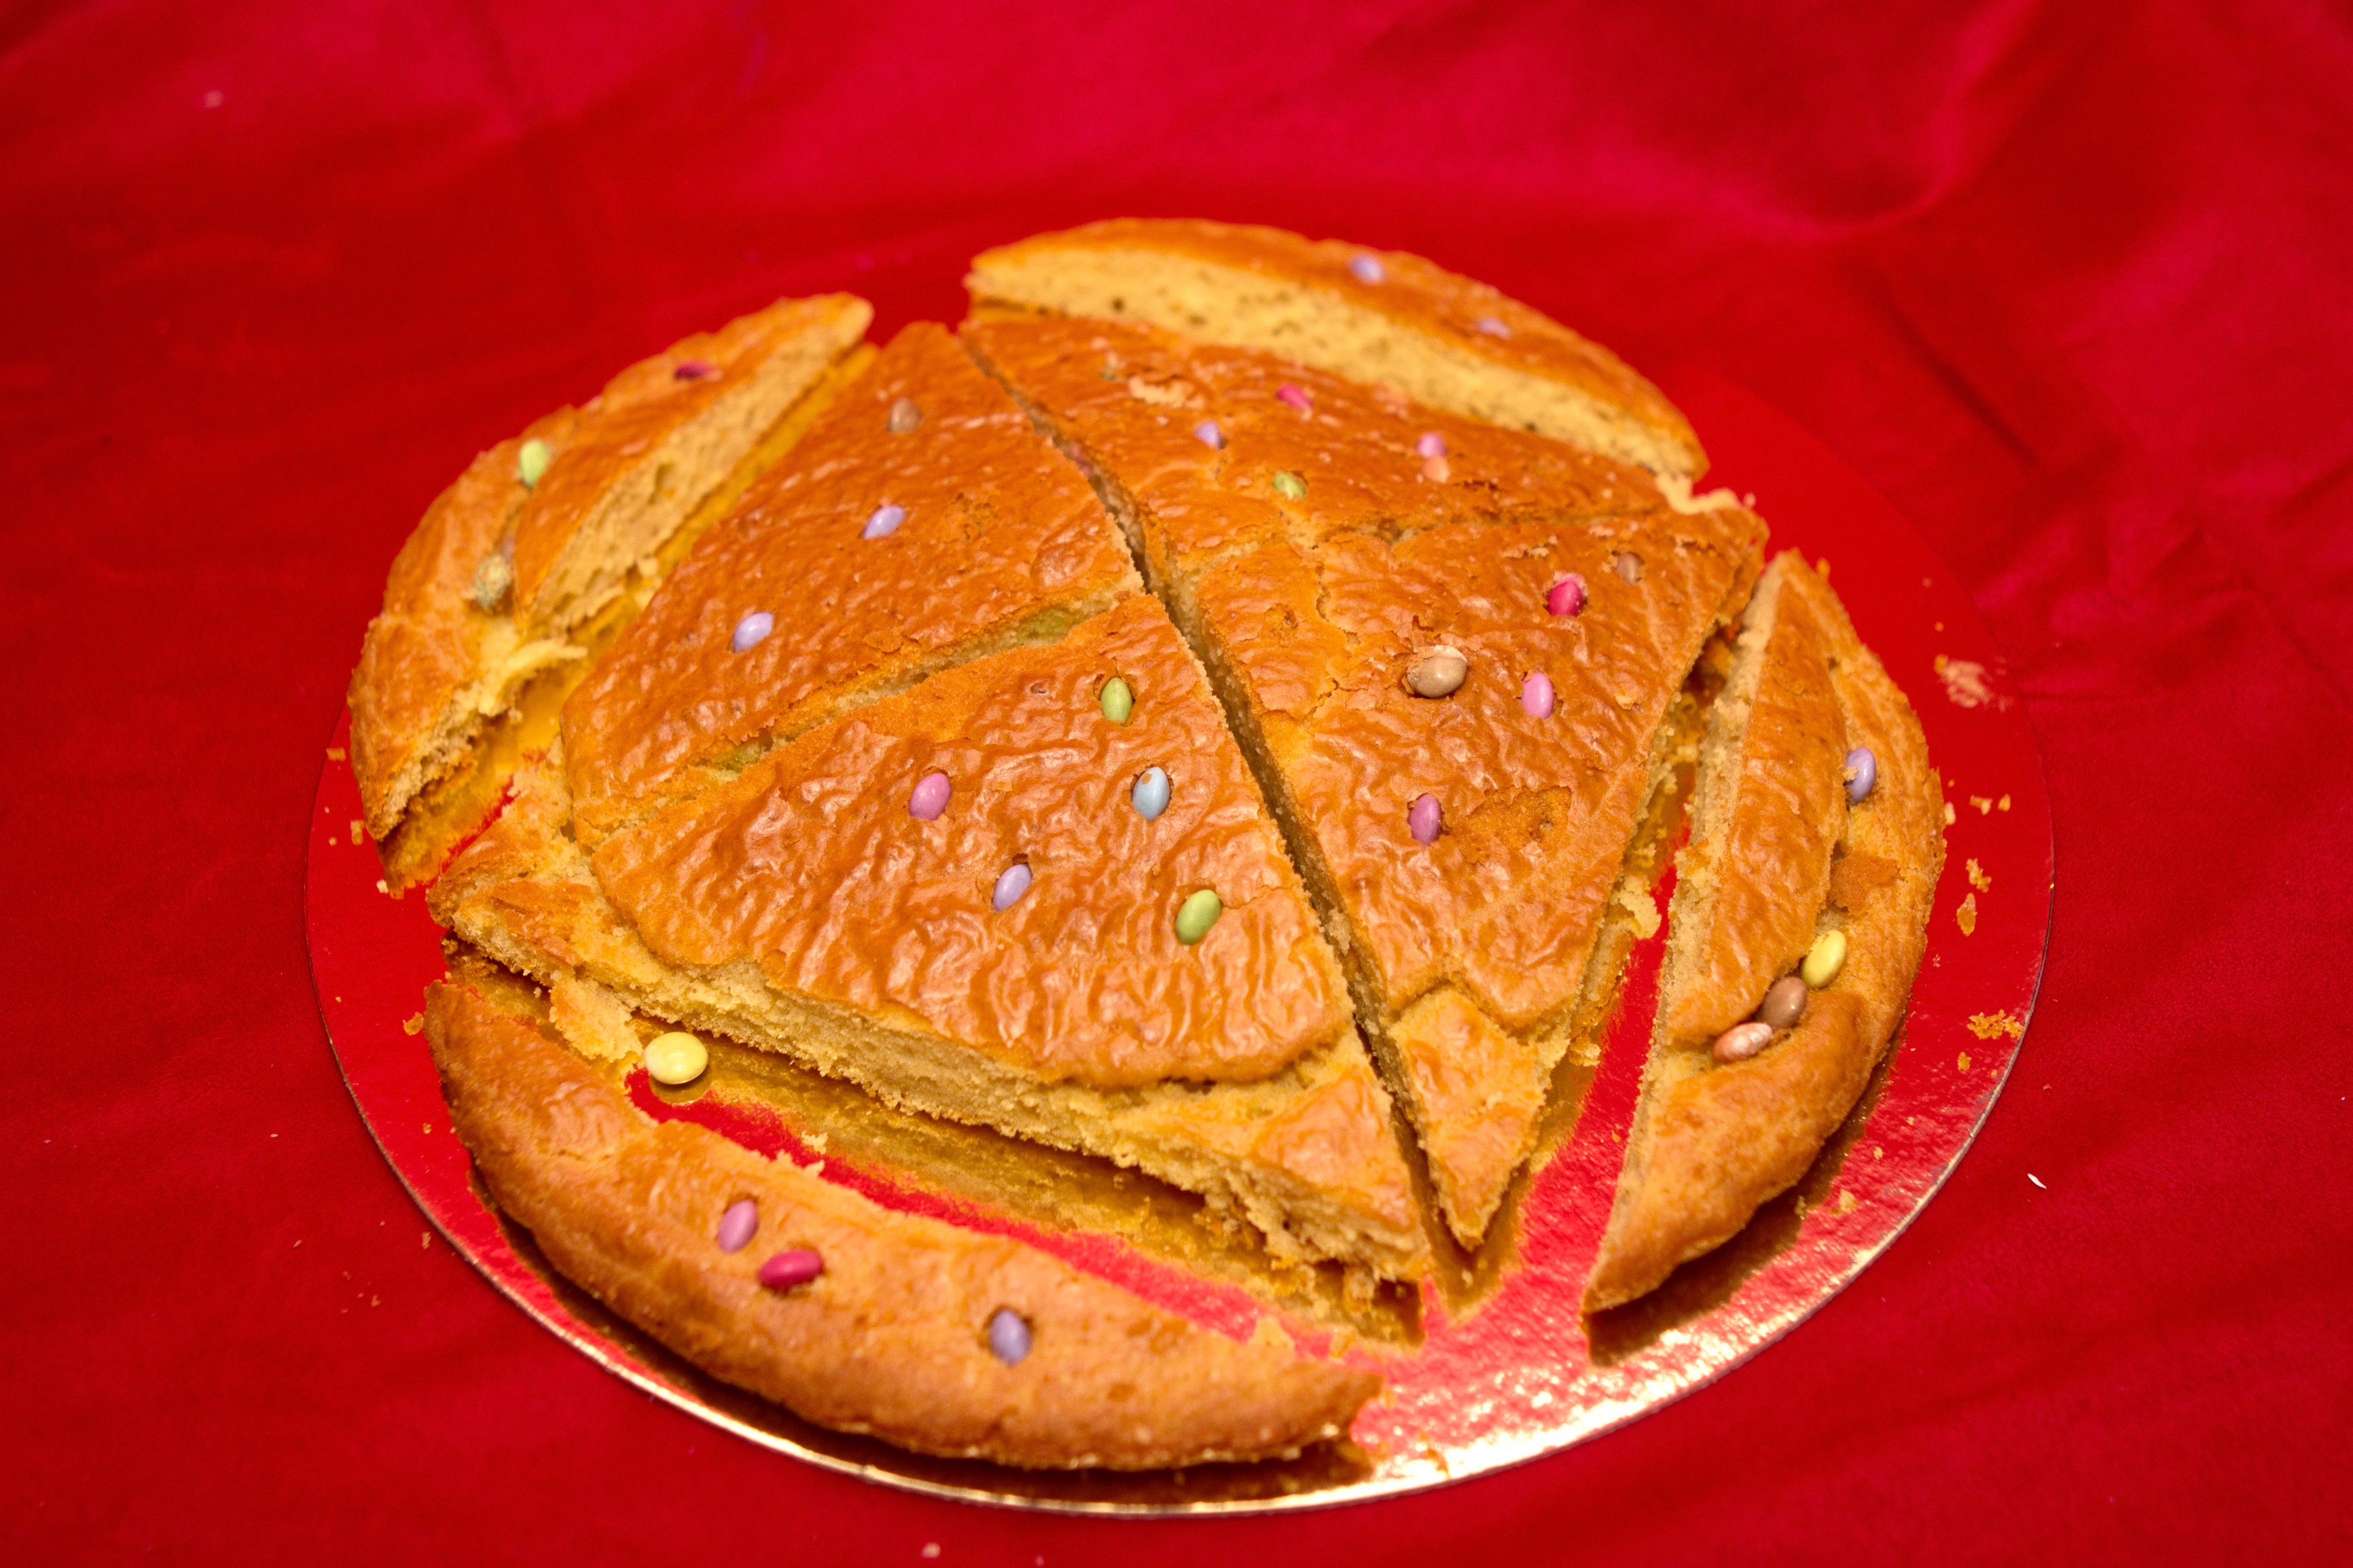

In [2]:
from IPython.display import Image
Image('http://www.piday.fr/images/tartes-2016/24.jpg')

## La recette

L'idée de cette tarte est de commencer par la forme ronde du moule...

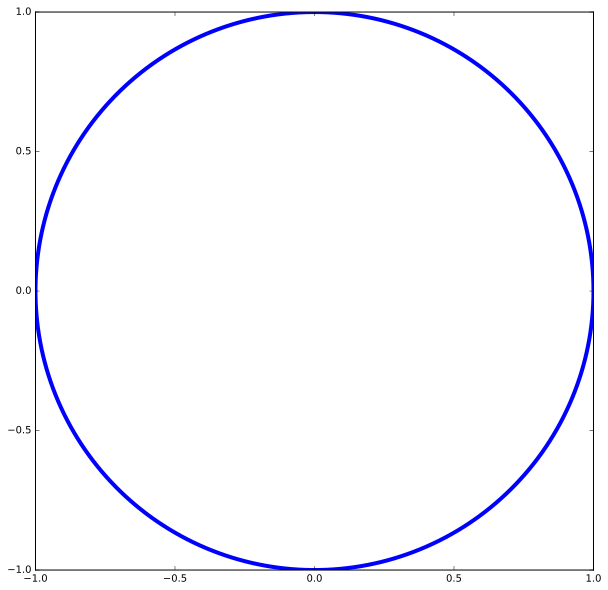

In [3]:
fig, ax = plt.subplots(figsize=figsize)
N_dots = 256
angles = np.linspace(0, 2*np.pi, N_dots, endpoint=True)
ax.plot(np.cos(angles), np.sin(angles), lw=4);

et de tracer le plus grand carré qu'on puisse y inscrire. Pour celà, rien de plus simple, il suffit de tracer les diagonales sur les cardinales (nord-sud et est-ouest):

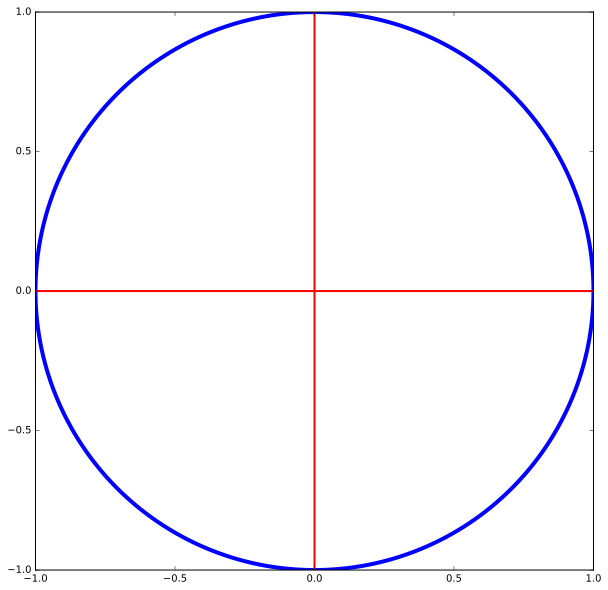

In [4]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.cos(angles), np.sin(angles), lw=4);
ax.plot([0, 0], [-1, 1], 'r', lw=2);
ax.plot([-1, 1], [0, 0], 'r', lw=2);

et de joindre leur extrémités pour obtenir ce carré:

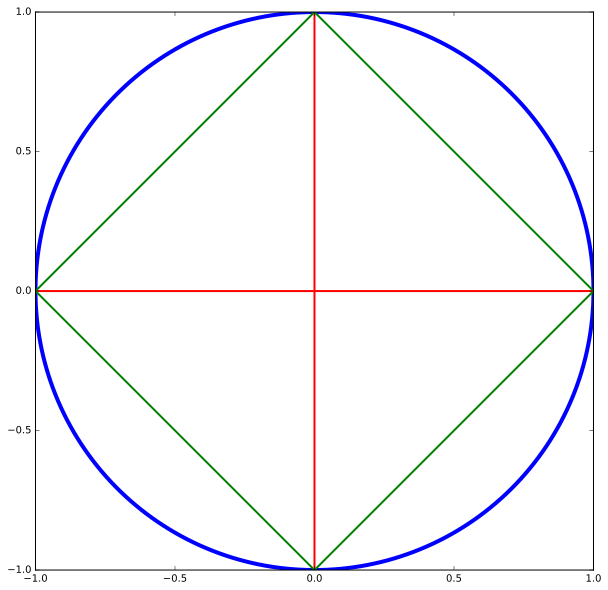

In [5]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.cos(angles), np.sin(angles), lw=4);
ax.plot([0, 0], [-1, 1], 'r', lw=2);
ax.plot([-1, 1], [0, 0], 'r', lw=2);
ax.plot([0, 1], [1, 0], 'g', lw=2);
ax.plot([0, 1], [-1, 0], 'g', lw=2);
ax.plot([0, -1], [1, 0], 'g', lw=2);
ax.plot([0, -1], [-1, 0], 'g', lw=2);

À noter: le disque contenu dans le cercle bleu a un diametre de $2$, sa surface est donc égale à $\pi$. Le carré vert est composé de quatre triangles isocèle rectangle qui peuvent être réarrangés en deux carrés unitaires: sa surface vaut donc $2$. De façon équivalente, la longueur de son coté est $\sqrt{2}$ (c'est la longueur de l'hypothénuse du carré unité car par Pythagore sa longueur vaut $\sqrt{1^2 + 1^2}$) ce qui confirme que la surface est bien $2$.

Prenons donc maintenant une bonne poignée de smarties (disons $22$) et jetons les sur la tarte. (On dit que si l'un tombe de la tarte -comme sur la photo ci-dessus- on le jette à nouveau au hasard sur la tarte.)

In [6]:
N_smarties = 22
np.random.seed(42+1)
angle_smarties = 2*np.pi*np.random.rand(N_smarties)
radius_smarties = np.sqrt(np.random.rand(N_smarties))
x_smarties = radius_smarties * np.cos(angle_smarties)
y_smarties = radius_smarties * np.sin(angle_smarties)

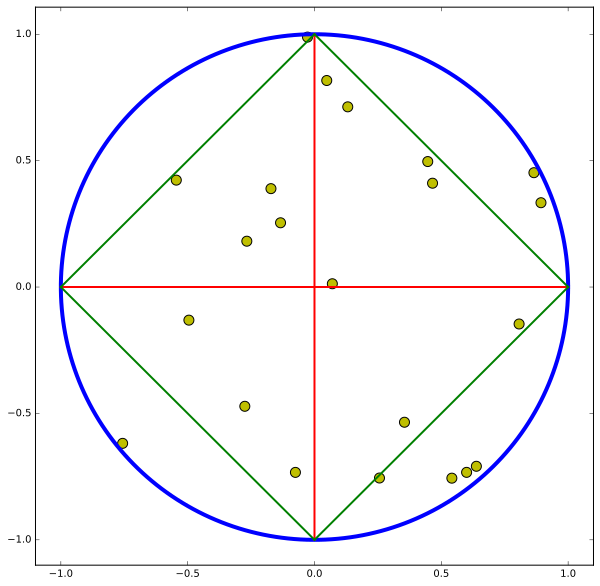

In [7]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.cos(angles), np.sin(angles), lw=4);
ax.plot([0, 0], [-1, 1], 'r', lw=2);
ax.plot([-1, 1], [0, 0], 'r', lw=2);
ax.plot([0, 1], [1, 0], 'g', lw=2);
ax.plot([0, 1], [-1, 0], 'g', lw=2);
ax.plot([0, -1], [1, 0], 'g', lw=2);
ax.plot([0, -1], [-1, 0], 'g', lw=2);
ax.scatter(x_smarties, y_smarties, s=100, c='y', lw=1);
ax.axis('tight');

La tarte, avec son carré et ses smarties, est prète! 

## Monte Carlo?

Maintenant, pourquoi "Monte Carlo"? Parce que cette cité balnéaire du sud de la France est bien connue pour ses casinos, et que là, le hasard est loi (souvent en faveur des opérateurs de ces casinos mais c'est une autre histoire). Par jeu, des mathématiciens ont utilisé ce topnyme pour désigner les algorithmes qui utilisent des méthodes aléatoires pour effectuer des calculs. En particulier ces méthodes sont utilisées pour calculer l'aire de certaines surfaces, les fameuses "integrales" (dont le symbole est $\int$). D'innombrables applications pratiques en mathématiques et physique pour lesquelles les variables résident dans des espaces à hautes dimensions (par exemple une image pour laquelle chaque pixel constitue une dimension) dépendent de ces solutions. Pour le moment, restons dans l'espace bidimensionnel de notre tarte...

En effet, quel lien entre Monte Carlo et notre tarte? 

Tout d'abord, on peut facilement compter le nombre de smarties qui sont tombés dans le carré:

In [8]:
in_square = ((x_smarties+y_smarties)**2 < 1 ) * ((x_smarties-y_smarties)**2 < 1 )

et les peindre d'une couleur différente:

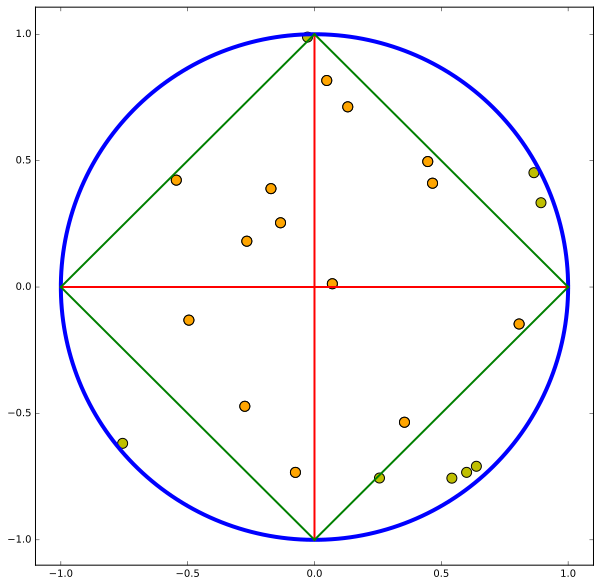

In [9]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.cos(angles), np.sin(angles), lw=4);
ax.plot([0, 0], [-1, 1], 'r', lw=2);
ax.plot([-1, 1], [0, 0], 'r', lw=2);
ax.plot([0, 1], [1, 0], 'g', lw=2);
ax.plot([0, 1], [-1, 0], 'g', lw=2);
ax.plot([0, -1], [1, 0], 'g', lw=2);
ax.plot([0, -1], [-1, 0], 'g', lw=2);
ax.scatter(x_smarties, y_smarties, s=100, c='y', lw=1);
ax.scatter(x_smarties[in_square], y_smarties[in_square], s=100, c='orange', lw=1);
ax.axis('tight');

Aussi, nous avons jeté les smarties au hasard: leur probabilité d'attérir n'importe où sur la tarte est uniforme. Par  conséquent, la probabilité d'attérir dans le carré est le ratio de sa surface relative à celle du cercle, soit $\frac{2}{\pi}\approx 63\%$. Voyons voir ce que celà donne:


In [10]:
print(" > Probabilité d'être dans le carré ", 2 / np.pi)
print(' > notre observation ', np.sum(in_square)/N_smarties)

 > Probabilité d'être dans le carré  0.6366197723675814
 > notre observation  0.636363636364


des résultats proches! On note alors le but de notre calcul: le nombre relatif de smarties donne une approximation de $\pi$ comme

$$
\pi \approx 2 * \frac {N}{n}
$$

où $N$ est le nombre total de smarties et $n$ le nombre de smarties tombés dans le carré. J'ai trouvé la possibilité d'approcher un nombre aussi respecté que π par un simple jet aléatoire de sucreries suffisant pour inscrire cette tarte au concours...

Pour cette tarte en particulier (donc cette instance particulière de l'expérience de Monte Carlo):

In [11]:
print(' > Probabilité d''être dans le carré ', 2 / np.pi)
print(' > notre estimée de π = ', 2.*N_smarties/np.sum(in_square), ' ; Valeur réelle π = ', np.pi)
print(' > erreur = ', (2.*N_smarties/np.sum(in_square)-np.pi)/np.pi * 100, ' % ')

 > Probabilité dêtre dans le carré  0.6366197723675814
 > notre estimée de π =  3.14285714286  ; Valeur réelle π =  3.141592653589793
 > erreur =  0.0402499434771  % 


MAGNIFIQUE! On obtient avec seulement $22$ smarties une estimée de l'ordre de $0.04 \%$!

## une évaluation quantitative

On peut résumer notre algorithme à la fonction suivante dans laquelle nous généralisons pour un nombre arbitraire de smarties:

In [12]:
def monte_carlo(N_smarties=22, seed=2015):
    np.random.seed(seed)
    angle_smarties = 2*np.pi*np.random.rand(N_smarties)
    radius_smarties = np.sqrt(np.random.rand(N_smarties))
    x_smarties = radius_smarties * np.cos(angle_smarties)
    y_smarties = radius_smarties * np.sin(angle_smarties)
    in_square = ((x_smarties+y_smarties)**2 < 1 ) * ((x_smarties-y_smarties)**2 < 1 )
    return 2.*N_smarties/np.sum(in_square)

Evaluons cette méthode ave 10, 100, ..., un million de smarties (quelle tarte!):

In [13]:
for N in 10**np.arange(7):
    print(' >> Avec ', N, ' smarties, notre estimée de π = ', monte_carlo(N_smarties=N))

 >> Avec  1  smarties, notre estimée de π =  2.0
 >> Avec  10  smarties, notre estimée de π =  2.22222222222
 >> Avec  100  smarties, notre estimée de π =  4.0
 >> Avec  1000  smarties, notre estimée de π =  3.1007751938
 >> Avec  10000  smarties, notre estimée de π =  3.11623558741
 >> Avec  100000  smarties, notre estimée de π =  3.14322085841
 >> Avec  1000000  smarties, notre estimée de π =  3.14530688759


On voit que l'estimation devient progressivement meilleure.

Quand nous n'avons pas autant de smarties, une autre solution est de répéter l'expérience plusieurs fois. Pour celà, nous utilisons un aspect important des générateurs de nombres aléatoires: ils sont *pseudo-aléatoires*. En effet, si ces méthodes donnent par défaut des valeurs aléatoires et indépendentes, elles n'en restent pas moins des algorithmes déterministes. En particulier, si on spécifie la vealur initiale de l'algorithm (la "graine"), on obtient alors toujours la même série de nombres aléatoires. On dit alors que le bruit est *gelé*. C'est utile ici pour répéter la même expérience avec des séquences différentes mais reproducibles:


In [14]:
for seed in range(42, 55):
    print(' >> avec la graine = ', seed, ' , notre estimée de π = ', monte_carlo(seed=seed))

 >> avec la graine =  42  , notre estimée de π =  2.93333333333
 >> avec la graine =  43  , notre estimée de π =  3.14285714286
 >> avec la graine =  44  , notre estimée de π =  3.66666666667
 >> avec la graine =  45  , notre estimée de π =  2.58823529412
 >> avec la graine =  46  , notre estimée de π =  2.93333333333
 >> avec la graine =  47  , notre estimée de π =  3.38461538462
 >> avec la graine =  48  , notre estimée de π =  3.38461538462
 >> avec la graine =  49  , notre estimée de π =  3.14285714286
 >> avec la graine =  50  , notre estimée de π =  3.66666666667
 >> avec la graine =  51  , notre estimée de π =  3.66666666667
 >> avec la graine =  52  , notre estimée de π =  2.93333333333
 >> avec la graine =  53  , notre estimée de π =  4.0
 >> avec la graine =  54  , notre estimée de π =  2.58823529412


Etrange? La méthode est précise pour certaines instances, pas pour d'autres... Pourquoi et qu'apprenons nous de cette observation?

Imaginons que nous avons $N=1000$ et beaucoup ($10000$) de répétitions de notre estimation:

In [15]:
N_trials = 10000
pi_estimate = np.empty(N_trials)
for seed in range(N_trials):
    pi_estimate[seed] = monte_carlo(N_smarties=1000, seed=42 + seed)
N_bins = 32
pi_hist, bins = np.histogram(pi_estimate, bins=np.linspace(2.8, 3.5, N_bins))

On peut alors tracer l'histogramme, c'est-à-dire le diagramme montrant la distribution des différentes valeurs obtenues pour des répétitions indépendentes de notre méthode:

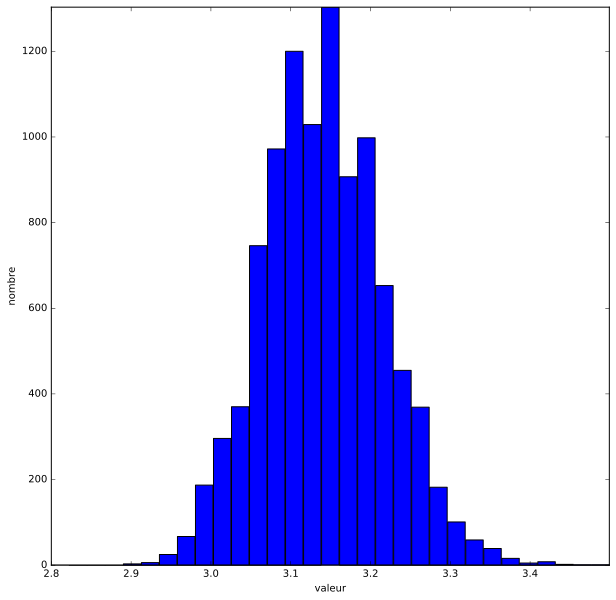

In [16]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(bins[:-1], pi_hist, width=(bins.max()-bins.min())/(len(bins)));
ax.set_xlabel('valeur')
ax.set_ylabel('nombre')
ax.axis('tight');

Un tel comportement est fréquent en sciences: En essayant d'éstimer une valeur inconnue (on dit alors que c'est une variable *cachée* ou *latente*), ici $\pi$, nous obtenons une mesure approchée. Elle est approchée par l'intermédiaire de différente sources de bruit, comme l'alea dans notre algorithme de Monte Carlo mais ce peut être le bruit de mesure d'un appareil de mesure imparfait, le bruit inhérent dans un telescope qui essaie de détecter une source très distante, un neurone qui s'active de façon imprédictible, ... L'évaluation de la variabilité de la méthode est par conséquent une étape essentielle du processus scientifique.

Les mathématiques offrent alors des outils qui nous permettent de généraliser cette variabilité. Premièrement, on reconnait la forme de cet  histogramme, c'est une Gaussienne (ou loi *normale*, ou  courbe en *cloche*) dqui est simplement caractérisée par deux paramètres (que les statisticiens appellent les deux premiers moments):

In [17]:
pi_mean = pi_estimate.mean()
pi_std = pi_estimate.std()
print(' >> distribution de moyenne = ', pi_mean, ', déviation standard = ', pi_std)

 >> distribution de moyenne =  3.14187806555 , déviation standard =  0.0749742780533


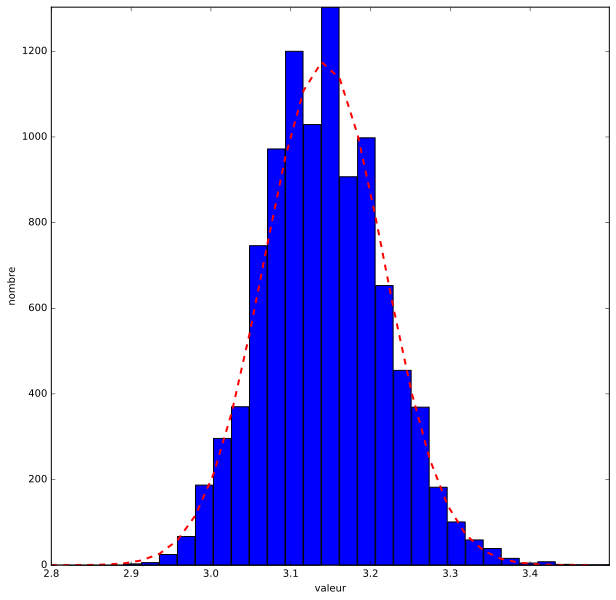

In [18]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(bins[:-1], pi_hist, width=(bins.max()-bins.min())/(len(bins)));
ax.plot(bins[:-1], N_trials/N_bins/np.sqrt(4*np.pi)/pi_std  * np.exp(- .5 * (bins[:-1] -pi_mean)**2 / pi_std**2), 'r--', lw=2);
ax.set_xlabel('valeur')
ax.set_ylabel('nombre')
ax.axis('tight');

Ce résultat est la conséquence du *theorème central limite*. Celui-ci montre que quand l'on collecte indépendamment des valeurs autour d'une certaine moyenne et avec une certaine valeur de bruit, alors la distribution est une Gaussienne. 

Un résultat important de ce théorème est de montrer que quand on augmente le nombre d'échantillons (ici, c'est le nombre de smarties qui nous servent à estimer π), alors la précision (c'est à dire l'inverse du carré de la déviation standard) augmente proportionnellement avec ce nombre:

Avec  200  smarties, la distribution en cloche de moyenne =  3.15015074545 , déviation standard =  0.171559398588
 > erreur =  0.272412524503  % 
 > erreur quadratique normalisée =  0.00148417167013
Avec  2000  smarties, la distribution en cloche de moyenne =  3.14349248209 , déviation standard =  0.052465562109
 > erreur =  0.060473419515  % 
 > erreur quadratique normalisée =  0.000731406893569
Avec  20000  smarties, la distribution en cloche de moyenne =  3.14194378214 , déviation standard =  0.0167228382826
 > erreur =  0.0111767687879  % 
 > erreur quadratique normalisée =  0.000249840321079
Avec  200000  smarties, la distribution en cloche de moyenne =  3.14156499664 , déviation standard =  0.00531358827661
 > erreur =  0.000880347902559  % 
 > erreur quadratique normalisée =  1.55002485908e-05


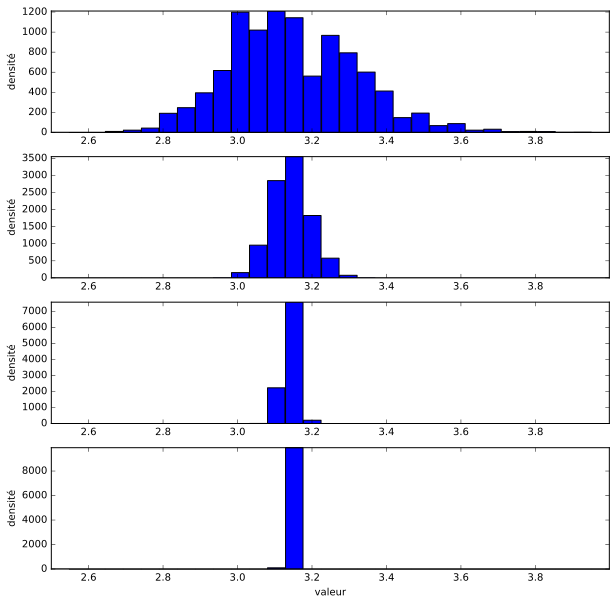

In [19]:
N_trials = 10000
N_levels = 4
fig, axs = plt.subplots(N_levels, 1, figsize=figsize)
for i_level in range(N_levels):
    N_smarties = 2*10**(2 + i_level)
    pi_estimate = np.empty(N_trials)
    for seed in range(N_trials):
        pi_estimate[seed] = monte_carlo(N_smarties=N_smarties, seed=42 + seed)
    pi_hist, bins = np.histogram(pi_estimate, bins=np.linspace(2.5, 4., N_bins))

    pi_mean = pi_estimate.mean()
    pi_std = pi_estimate.std()
    print(u'Avec ', N_smarties, ' smarties, la distribution en cloche de moyenne = ', pi_mean, ', déviation standard = ', pi_std)
    print(' > erreur = ', np.abs(pi_mean-np.pi)/np.pi * 100, ' % ')
    print(' > erreur quadratique normalisée = ', ((pi_mean-np.pi)/np.pi)**2 * (N_smarties))
    
    axs[i_level].bar(bins[:-1], pi_hist, width=(bins.max()-bins.min())/(len(bins)));
    axs[i_level].set_ylabel('densité')
    axs[i_level].axis('tight');
axs[i_level].set_xlabel('valeur');


Remémorons nous la hiérarchie de notre procédure:

 - nous testons des distributions à différents nombre d'échantillons,
 - à chaque niveau, nous effectuons différents essais,
 - pour chaque essai, nous faisons une tarte avec beaucoup de smarties et comptons leur nombre relatif dans le carré.
 
Ce semble compliqué mais prend seulement quelques secondes sur un ordianteur moderne --- ce qui explique la popularité de telles méthodes de nos jours.

Mais ça explique aussi pourquoi les scientifiques sont précautionneux avant de clamer sur tous les toits un résultat qui n'est pas encore validé statistiquement! En particulier, une valeur estimée est souvent donnée  autour d'une valeur médiane et dans un intervale de confidence correpondant à 95% des cas:

In [20]:
N_trials = 10000
pi_estimate = np.empty(N_trials)
for seed in range(N_trials):
    pi_estimate[seed] = monte_carlo(N_smarties=1000, seed=42 + seed)
pi_hist, bins = np.histogram(pi_estimate, bins=np.linspace(2.8, 3.5, 32))
pi_median = np.median(pi_estimate)
pi_low = np.percentile(pi_estimate, 5)
pi_high = np.percentile(pi_estimate, 95)
print(u' distribution en cloche de médiane = ', pi_median, ', dans l''intervale [ ', pi_low, ',', pi_high, ']')

 distribution en cloche de médiane =  3.13971742543 , dans lintervale [  3.02114803625 , 3.26797385621 ]


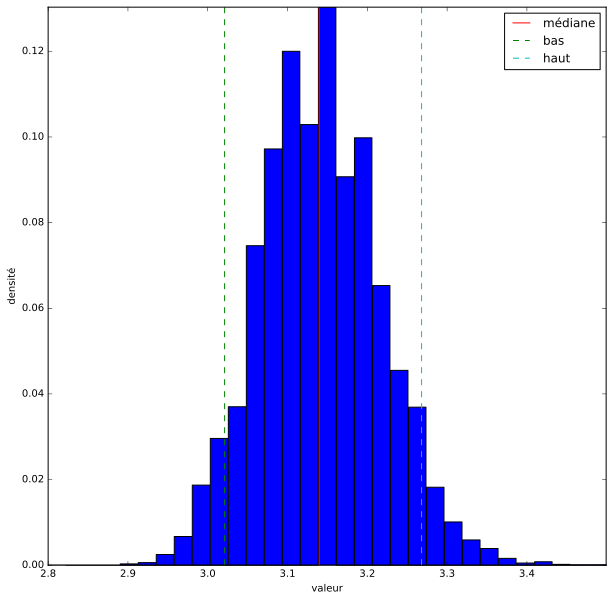

In [21]:
fig, ax = plt.subplots(figsize=figsize)
pi_hist = pi_hist * 1.
pi_hist /= pi_hist.sum()
ax.bar(bins[:-1], pi_hist, width=(bins.max()-bins.min())/(len(bins)));
ax.plot([pi_median, pi_median], [0, pi_hist.max()], 'r', label='médiane');
ax.plot([pi_low, pi_low], [0, pi_hist.max()], 'g--', label='bas');
ax.plot([pi_high, pi_high], [0, pi_hist.max()], 'c--', label='haut');
ax.set_xlabel('valeur')
ax.set_ylabel('densité')
ax.axis('tight');
ax.legend(loc='best');

Notre exploration de cette tarte bien spéciale est presque terminée: d'une tarte, nous avons déduit un algorithme qui calcule une valeur approchée de π. Nous avons alors observé que ce résultat variait et avons tiré parti d'outils mathématiques pour quantifier cette variabilité. Maintenant, nous savons que π vaut environ $3.15$ et *presque surement* entre $3.05$ et $3.25$. Très bien.

## un éléphant dans la salle?

Mais attendez, ce résultat est en désaccord avec le résultat triomphal obtenu avec la tarte à $22$ smarties avec une erreur de l'ordre de $0.04 \%$! C'est bien mieux que le résultat avec $10000$ tartes de $1000$ smarties... Que c'est-il passé?

Nous avons vu en haut que les résultats dépendent de l'instance (graine) du générateur de nombre aléatoires:

In [22]:
for seed in range(42, 55):
    print(' >> avec la graine = ', seed, ' , notre estimée de π = ', monte_carlo(seed=seed))

 >> avec la graine =  42  , notre estimée de π =  2.93333333333
 >> avec la graine =  43  , notre estimée de π =  3.14285714286
 >> avec la graine =  44  , notre estimée de π =  3.66666666667
 >> avec la graine =  45  , notre estimée de π =  2.58823529412
 >> avec la graine =  46  , notre estimée de π =  2.93333333333
 >> avec la graine =  47  , notre estimée de π =  3.38461538462
 >> avec la graine =  48  , notre estimée de π =  3.38461538462
 >> avec la graine =  49  , notre estimée de π =  3.14285714286
 >> avec la graine =  50  , notre estimée de π =  3.66666666667
 >> avec la graine =  51  , notre estimée de π =  3.66666666667
 >> avec la graine =  52  , notre estimée de π =  2.93333333333
 >> avec la graine =  53  , notre estimée de π =  4.0
 >> avec la graine =  54  , notre estimée de π =  2.58823529412


Si on répète de nombreuses fois l'expérience, on obtient: 

In [23]:
N_trials = 10000
pi_estimate = np.empty(N_trials)
for seed in range(N_trials):
    pi_estimate[seed] = monte_carlo(N_smarties=22, seed=42 + seed)
pi_hist, bins = np.histogram(pi_estimate, bins=np.linspace(2., 5., 128))

On peut alors tracer l'histogramme, c'est-à-dire le diagramme montrant la distribution des différentes valeurs obtenues pour des répétitions indépendentes de notre méthode:

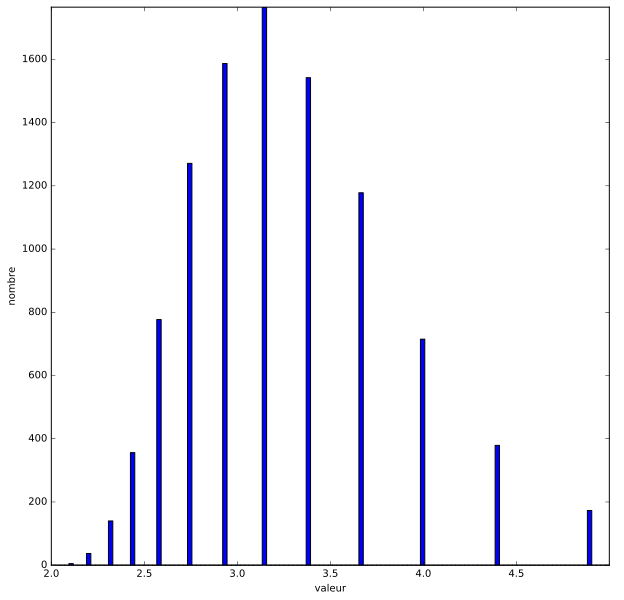

In [24]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(bins[:-1], pi_hist, width=(bins.max()-bins.min())/(len(bins)));
ax.set_xlabel('valeur')
ax.set_ylabel('nombre')
ax.axis('tight');

Comme maintenant nous avons utilisé un nombre limité de smarties, la distribution a toujours une envelope Gaussienne, mais n'est non-nulle que pour certaines valeurs précises (qui correspondent aux valeurs possibles de type $\frac k {22}$). Parmi ces différentes valeurs, la plus probable est celle qui donne une excellente approximation de π:

In [25]:
print(u' >> notre estimée de π = ', 22/7, ' ; Valeur réelle de π = ', np.pi)

 >> notre estimée de π =  3.142857142857143  ; Valeur réelle de π =  3.141592653589793


Cette approximation de π est connue depuis longtemps, mais deux questions émergent:

 - le cuistot a menti?
 - pourquoi cette approximation est bonne?
 
Pour la première question, on peut répondre en estimant le ratio de tartes à $22$ smarties qui n'aurait pas donné $7$ smarties:

In [26]:
print(u' >> estimée que le cuistot a triché = ', (1 - pi_hist.max() / pi_hist.sum()) * 100, ' % ')

 >> estimée que le cuistot a triché =  82.2166246851  % 


J'admets que j'ai "aidé" le hasard.... Encore un rappel de faire attention à toute déclaration trop optimiste à apartir de résultats scientifiques préliminaires... 

Pire que ça, un autre biais est la connaissance que le nombre $22$ donne une bonne estimation. Quoi? Mais, pourquoi $22$ et pas $42$? A priori, il n'y a pas de raison qu'une approximation de π soit meilleure qu'une autre. 

Examinons les erruers obtenues quand on change le dénominateur d'une approximation de π par un nombre rationnel:

$$
\pi \approx \frac n d
$$
tel que 
$$
n = I( \pi \cdot d)
$$
où $I(x)$ est la valeur entière de $x$.

In [27]:
for denominator in np.arange(1, 20):
    numerator = np.ceil(np.pi*denominator)
    print(u' >> notre estimée de π = ', int(numerator), '/', denominator, '= ', numerator/denominator , ' ; Erreur sur π = ', np.absolute(1.*numerator/denominator - np.pi))

 >> notre estimée de π =  4 / 1 =  4.0  ; Erreur sur π =  0.85840734641
 >> notre estimée de π =  7 / 2 =  3.5  ; Erreur sur π =  0.35840734641
 >> notre estimée de π =  10 / 3 =  3.33333333333  ; Erreur sur π =  0.191740679744
 >> notre estimée de π =  13 / 4 =  3.25  ; Erreur sur π =  0.10840734641
 >> notre estimée de π =  16 / 5 =  3.2  ; Erreur sur π =  0.0584073464102
 >> notre estimée de π =  19 / 6 =  3.16666666667  ; Erreur sur π =  0.0250740130769
 >> notre estimée de π =  22 / 7 =  3.14285714286  ; Erreur sur π =  0.00126448926735
 >> notre estimée de π =  26 / 8 =  3.25  ; Erreur sur π =  0.10840734641
 >> notre estimée de π =  29 / 9 =  3.22222222222  ; Erreur sur π =  0.0806295686324
 >> notre estimée de π =  32 / 10 =  3.2  ; Erreur sur π =  0.0584073464102
 >> notre estimée de π =  35 / 11 =  3.18181818182  ; Erreur sur π =  0.0402255282284
 >> notre estimée de π =  38 / 12 =  3.16666666667  ; Erreur sur π =  0.0250740130769
 >> notre estimée de π =  41 / 13 =  3.153846

Traçons la valeur de l'erreur en fonction du dénominateur:

In [28]:
def int_numerator(denominator, number=np.pi): 
    return np.ceil(number*denominator)

N_test = 10000
pi_error = np.empty(N_test)
for i_test in range(N_test):
    denominator = 1. + i_test
    numerator = int_numerator(denominator)
    pi_error[i_test] = np.absolute(numerator/denominator - np.pi)

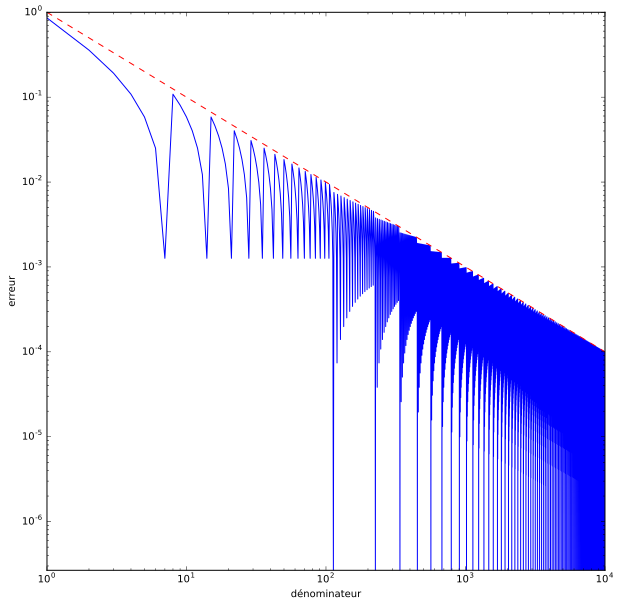

In [29]:
fig, ax = plt.subplots(figsize=figsize)
ax.loglog(np.arange(1, 1 + N_test), pi_error);
ax.loglog(np.arange(1, 1 + N_test), np.arange(1, 1 + N_test)**-1., 'r--');
ax.set_xlabel('dénominateur')
ax.set_ylabel('erreur')
ax.axis('tight');

Interessant, l'envelope de cette courbe suit une tendance décroissante qui est encore liée au théorème central limite: comme le dénominateur augmente, la précision aussi.  C'est la ligne pointillée en $1/d$, qui est une ligne droite car nous sommes en coordonnées logarithmiques sur les deux axes. 

Comparée à cette ligne de base, il est surprenant d'observer que l'erreur décroit puis on observe un pic. 
Le premier pic est à $7 / 22 $ (notre tarte) et ainsi de suite pour les $16$ prochains pics:

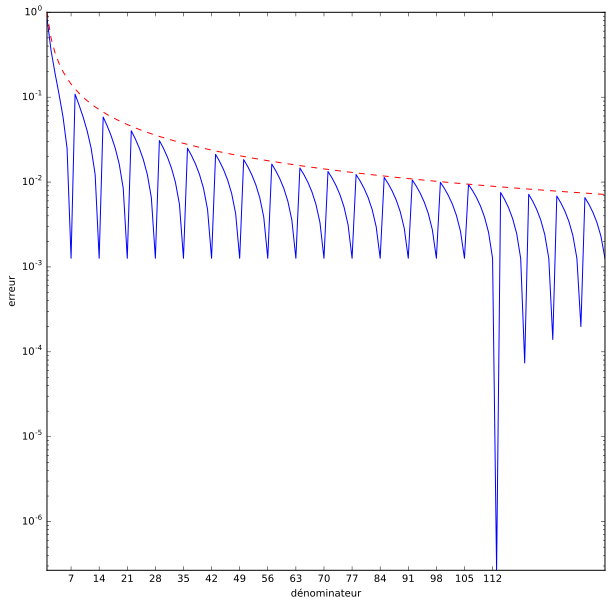

In [30]:
fig, ax = plt.subplots(figsize=figsize)
N_step = 140
ax.semilogy(np.arange(1, 1 + N_step), pi_error[:N_step]);
ax.semilogy(np.arange(1, 1 + N_step), np.arange(1, 1 + N_step)**-1., 'r--');
ax.set_xticks(7*np.arange(17))
ax.set_xticklabels(7*np.arange(17))
ax.set_xlabel('dénominateur')
ax.set_ylabel('erreur')
ax.axis('tight');

On pouvait s'y attendre car le même comportement se répète simplement pour des approximations égales:

$$
\frac {22} {7} = \frac {22*2} {7*2} =\frac {44} {14} = \frac {22*3} {7*3} = \frac {66} {21} = \ldots
$$

Aussi, le pic peut s'estimer qualitativement comme une approximation rogressive du rapport 22 / 7 (ligne verte):

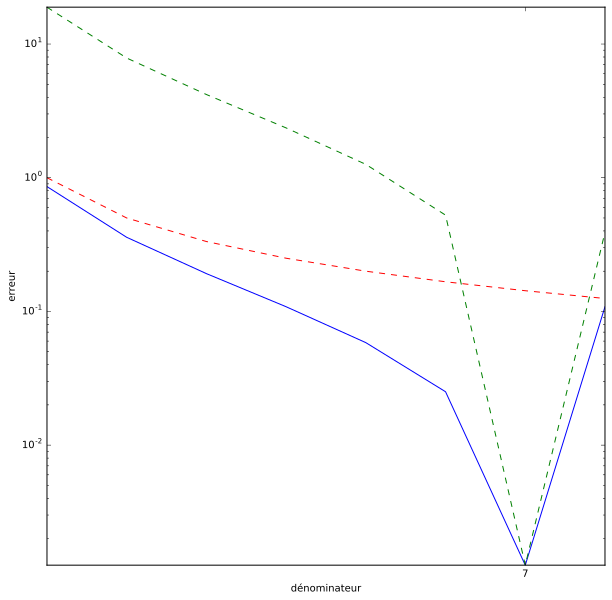

In [31]:
fig, ax = plt.subplots(figsize=figsize)
N_step = 8
ax.semilogy(np.arange(1, 1 + N_step), pi_error[:N_step]);
ax.semilogy(np.arange(1, 1 + N_step), np.arange(1, 1 + N_step)**-1., 'r--');
ax.semilogy(np.arange(1, 1 + N_step), np.absolute(22/np.arange(1, 1 + N_step) - np.pi), 'g--');
ax.set_xticks(7*np.arange(17))
ax.set_xticklabels(7*np.arange(17))
ax.set_xlabel('dénominateur')
ax.set_ylabel('erreur')
ax.axis('tight');

Mais *soudain*, nous avons une nouvelle approximation d'ordre encore supérieur:

In [32]:
for denominator in range(110, 116):
    print(u' >> notre estimée de π = ', int(int_numerator(denominator)), '/', denominator, ' = ', int_numerator(denominator)/denominator, ' ; Valeur réelle de π = ', np.pi)
    print(u' >> erreur = ', (int_numerator(denominator)/denominator-np.pi)/np.pi * 100, ' % ')

 >> notre estimée de π =  346 / 110  =  3.14545454545  ; Valeur réelle de π =  3.141592653589793
 >> erreur =  0.122927835992  % 
 >> notre estimée de π =  349 / 111  =  3.14414414414  ; Valeur réelle de π =  3.141592653589793
 >> erreur =  0.0812164667954  % 
 >> notre estimée de π =  352 / 112  =  3.14285714286  ; Valeur réelle de π =  3.141592653589793
 >> erreur =  0.0402499434771  % 
 >> notre estimée de π =  355 / 113  =  3.14159292035  ; Valeur réelle de π =  3.141592653589793
 >> erreur =  8.49136787674e-06  % 
 >> notre estimée de π =  359 / 114  =  3.14912280702  ; Valeur réelle de π =  3.141592653589793
 >> erreur =  0.239692228053  % 
 >> notre estimée de π =  362 / 115  =  3.14782608696  ; Valeur réelle de π =  3.141592653589793
 >> erreur =  0.19841634655  % 


Cette nouvelle approximation de π comme  355 / 113 est elle aussi bien connue et constitue une façon simple à 6 chiffres, alternative à la représentation décimale usuelle. (En particulier cette valeur est plus compacte car elle utilise moins de chiffres que la représentation décimale.) Au delà, on s'approche de la résolution des nombres flottant dans nos ordinateurs et demanderait beaucoup plus de travail...

Donc, à ce point, on sait que le cuistot a triché mais que c'était pour montrer un motif particulier dans les approximations de π par des nombres rationnels donc on peut presque l'excuser... Mais est-ce une propriété inhérente à π? Essayons à une autre star des nombres réels: $e$


In [33]:
N_test = 10000
e_error = np.empty(N_test)
for i_test in range(N_test):
    denominator = 1. + i_test
    numerator = int_numerator(denominator, number=np.exp(1))
    e_error[i_test] = np.absolute(numerator/denominator - np.exp(1))


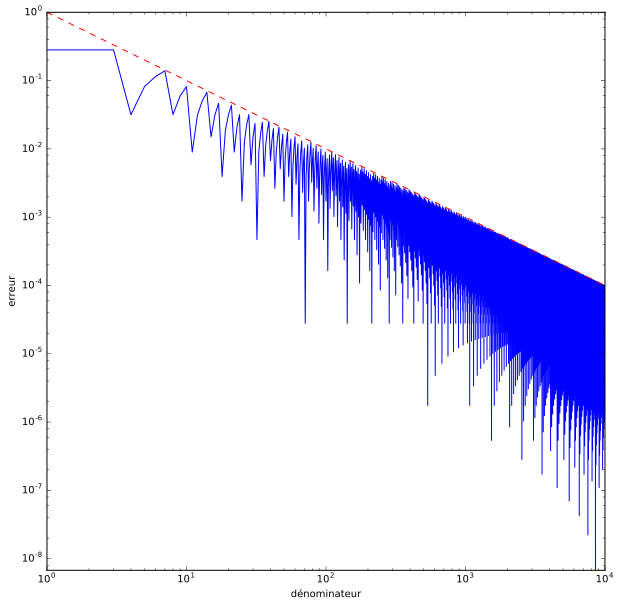

In [34]:
fig, ax = plt.subplots(figsize=figsize)
ax.loglog(np.arange(1, 1 + N_test), e_error);
ax.loglog(np.arange(1, 1 + N_test), np.arange(1, 1 + N_test)**-1., 'r--');
ax.set_xlabel('dénominateur')
ax.set_ylabel('erreur')
ax.axis('tight');

Comportement similaire.

Et avec le nombre d'or $\phi = .5 (1+ \sqrt 5)$, on peut s'attendre à des pics correspondant aux ratios de nombres consécutifs de Fibonacci:


In [35]:
phi = .5* (1 + np.sqrt(5))
N_test = 10000
e_error = np.empty(N_test)
for i_test in range(N_test):
    denominator = 1. + i_test
    numerator = int_numerator(denominator, number=phi)
    e_error[i_test] = np.absolute(numerator/denominator - phi)


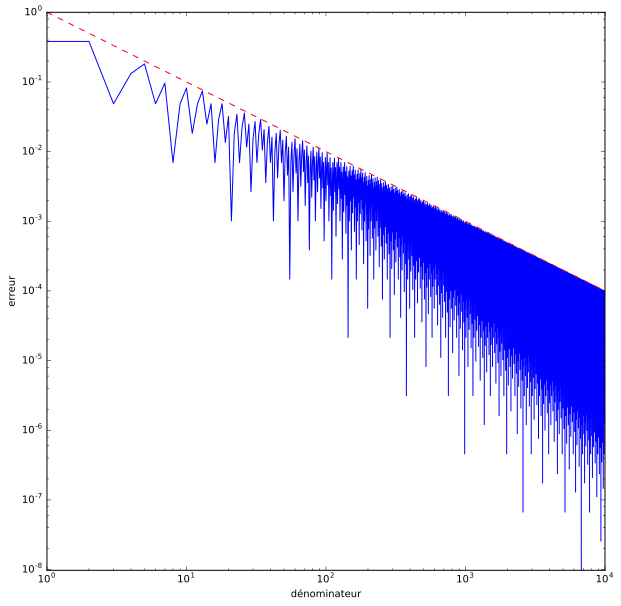

In [36]:
fig, ax = plt.subplots(figsize=figsize)
ax.loglog(np.arange(1, 1 + N_test), e_error);
ax.loglog(np.arange(1, 1 + N_test), np.arange(1, 1 + N_test)**-1., 'r--');
ax.set_xlabel('dénominateur')
ax.set_ylabel('erreur')
ax.axis('tight');

Encore une fois similaire! 


En conclusion, on ne se laisse pas prendre cette fois-ci, mais il y a encore plus à comprendre...